# Morons_chap-9

In [1]:
# loading modules
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np

# Registration packages
import fdasrsf as fs
import skfda
from skfda.datasets import fetch_growth, make_multimodal_samples
from skfda.preprocessing.registration import ElasticRegistration
from skfda.preprocessing.registration.elastic import elastic_mean

## Step function (fig 9.7)

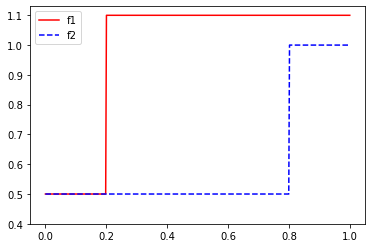

In [2]:
# generating data

Np = 400

x = np.linspace(0, 1, Np)
x1_step = 0.2
x2_step = 0.8

f1min, f1max = 0.5, 1.1
f2min, f2max = 0.5, 1

f1 = np.heaviside(x-x1_step, 1)
f1 = (f1max-f1min)*f1 + f1min

f2 = np.heaviside(x-x2_step, 1)
f2 = (f2max-f2min)*f2 + f2min


plt.plot(x, f1, "r", label="f1")
plt.plot(x, f2, "--b", label="f2")
plt.legend()
plt.ylim(0.4, None);

## Registration

In [3]:
f = np.vstack((f1, f2)).T
print(x.shape, f.shape)

(400,) (400, 2)


### scikit-fda

In [4]:
fd = skfda.FDataGrid(
    data_matrix=f.T,
    grid_points=x)


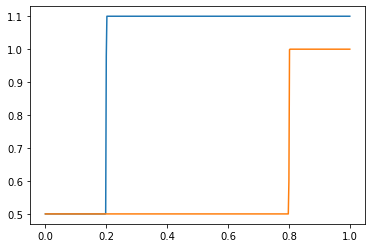

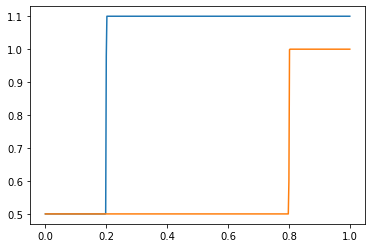

In [5]:
fd.plot()

In [6]:
# Registration
elastic_registration = ElasticRegistration()
fd_align = elastic_registration.fit_transform(fd)

IndexError: list assignment index out of range

In [163]:
# scikit-fda

pkg_lbl = "scikit-fda"

fd = skfda.FDataGrid(
    data_matrix=f.T,
    grid_points=x)


# Registration
elastic_registration = ElasticRegistration()
fd_align = elastic_registration.fit_transform(fd)

# getting warping fuction
gamma_t = np.copy(elastic_registration.warping_.data_matrix[:,:,0]).T # new evalution time points

# getting mean functions
fd_mean           = fd.mean()
fd_aligned_mean   = fd_align.mean().data_matrix[:,:,0].ravel()
#fd_elastic_mean   = elastic_mean(fd).data_matrix[:,:,0].ravel()

# getting aligned functions
f_new = np.copy(fd_align.data_matrix[:,:,0]).T # original shape is (2, 200, 1)

# plotting
fig, axes = plt.subplots(1,3,figsize=(10,3), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("step functions")
axes[i].plot(x, f_new[:,0], "r", label="f1")
axes[i].plot(x, f_new[:,1], "--b", label="f2")
axes[i].legend()

i+=1
axes[i].set_title("Warp")
axes[i].plot(x, gamma_t[:,0], "r")
axes[i].plot(x, gamma_t[:,1], "--b")

i+=1
axes[i].set_title("F aligned mean")
axes[i].plot(x, fd_aligned_mean);

fig.suptitle("N = %i, using %s"%(Np, pkg_lbl));

IndexError: list assignment index out of range

In [ ]:
# plotting samples

fig, axes = plt.subplots(2,2,figsize=(6,4), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("f1")
axes[i].scatter(x, f[:,0], s=1, color="r")
axes[i].set_ylabel("Step functions\n (samples)", fontsize=14)

i+=1
axes[i].set_title("f2")
axes[i].scatter(x, f[:,1],s=1, color="b");

i+=1
axes[i].scatter(x, f_new[:,0],s=1, color="r");
axes[i].set_ylabel("Aligned", fontsize=12)

i+=1
axes[i].scatter(x, f_new[:,1],s=1, color="b");


In [ ]:
df_elastic_mean = elastic_mean(fd).data_matrix[:,:,0].ravel()
plt.plot(x, df_elastic_mean);

###  fdasrsf

I got the error "fdasrsf/time_warping.py:204: RuntimeWarning:invalid value encountered in true_divide"

Initializing...
Compute Karcher Mean of 2 function in SRSF space...
updating step: r=1
updating step: r=2


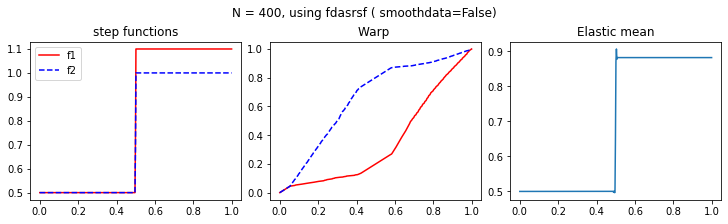

In [7]:
# fdasrsf | smoothdata=False

pkg_lbl = "fdasrsf ( smoothdata=False)"

obj = fs.fdawarp(f, x)
obj.srsf_align(smoothdata=False)

# getting warping fuction
gamma_t = np.copy(obj.gam) # new evalution time points

# getting mean functions
fd_mean           = fd.mean()
fd_elastic_mean   = np.copy(obj.fmean)

# getting aligned functions
f_new =  np.copy(obj.fn) # original shape is (2, 200, 1)

# plotting
fig, axes = plt.subplots(1,3,figsize=(10,3), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("step functions")
axes[i].plot(x, f_new[:,0], "r", label="f1")
axes[i].plot(x, f_new[:,1], "--b", label="f2")
axes[i].legend()

i+=1
axes[i].set_title("Warp ")
axes[i].plot(x, gamma_t[:,0], "r")
axes[i].plot(x, gamma_t[:,1], "--b");

i+=1
axes[i].set_title("Elastic mean")
axes[i].plot(x, fd_elastic_mean);

fig.suptitle("N = %i, using %s"%(Np, pkg_lbl));

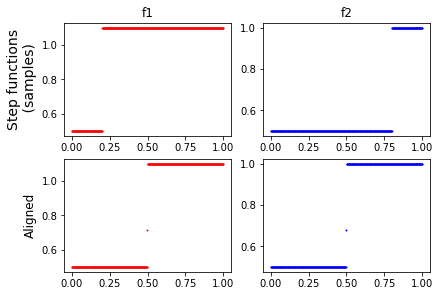

In [8]:
# plotting samples

fig, axes = plt.subplots(2,2,figsize=(6,4), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("f1")
axes[i].scatter(x, f[:,0], s=1, color="r")
axes[i].set_ylabel("Step functions\n (samples)", fontsize=14)

i+=1
axes[i].set_title("f2")
axes[i].scatter(x, f[:,1],s=1, color="b");

i+=1
axes[i].scatter(x, f_new[:,0],s=1, color="r");
axes[i].set_ylabel("Aligned", fontsize=12)

i+=1
axes[i].scatter(x, f_new[:,1],s=1, color="b");


Initializing...
Compute Karcher Mean of 2 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


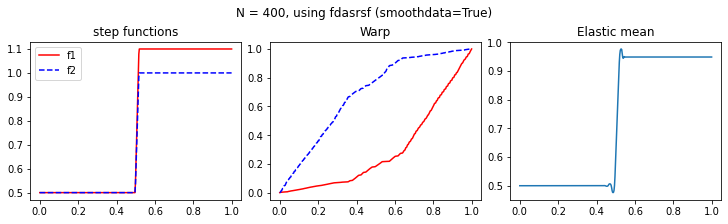

In [9]:
# fdasrsf | smoothdata=True

pkg_lbl = "fdasrsf (smoothdata=True)"

obj = fs.fdawarp(f, x)
obj.srsf_align(smoothdata=True)

# getting warping fuction
gamma_t = np.copy(obj.gam) # new evalution time points

# getting mean functions
fd_mean           = fd.mean()
fd_elastic_mean   = np.copy(obj.fmean)

# getting aligned functions
f_new =  np.copy(obj.fn) # original shape is (2, 200, 1)

# plotting
fig, axes = plt.subplots(1,3,figsize=(10,3), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("step functions")
axes[i].plot(x, f_new[:,0], "r", label="f1")
axes[i].plot(x, f_new[:,1], "--b", label="f2")
axes[i].legend()

i+=1
axes[i].set_title("Warp")
axes[i].plot(x, gamma_t[:,0], "r")
axes[i].plot(x, gamma_t[:,1], "--b");

i+=1
axes[i].set_title("Elastic mean")
axes[i].plot(x, fd_elastic_mean);

fig.suptitle("N = %i, using %s"%(Np, pkg_lbl));

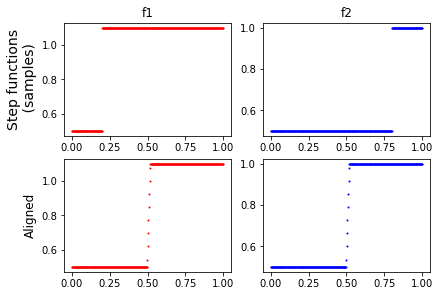

In [10]:
# plotting samples

fig, axes = plt.subplots(2,2,figsize=(6,4), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("f1")
axes[i].scatter(x, f[:,0], s=1, color="r")
axes[i].set_ylabel("Step functions\n (samples)", fontsize=14)

i+=1
axes[i].set_title("f2")
axes[i].scatter(x, f[:,1],s=1, color="b");

i+=1
axes[i].scatter(x, f_new[:,0],s=1, color="r");
axes[i].set_ylabel("Aligned", fontsize=12)

i+=1
axes[i].scatter(x, f_new[:,1],s=1, color="b");


## Moving the samples (do no reevaluate the function)

Initializing...
Compute Karcher Mean of 2 function in SRSF space...
updating step: r=1
updating step: r=2


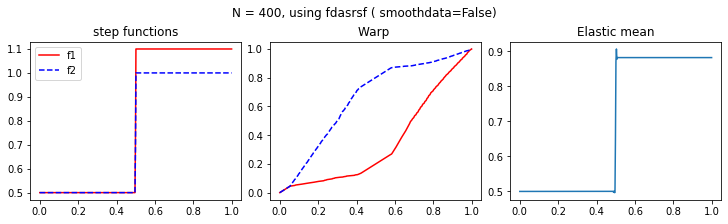

In [12]:
# fdasrsf | smoothdata=False

pkg_lbl = "fdasrsf ( smoothdata=False)"

obj = fs.fdawarp(f, x)
obj.srsf_align(smoothdata=False)

# getting warping fuction
gamma_t = np.copy(obj.gam) # new evalution time points

# getting mean functions
fd_mean           = fd.mean()
fd_elastic_mean   = np.copy(obj.fmean)

# getting aligned functions
f_new =  np.copy(obj.fn) # original shape is (2, 200, 1)

# plotting
fig, axes = plt.subplots(1,3,figsize=(10,3), constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("step functions")
axes[i].plot(x, f_new[:,0], "r", label="f1")
axes[i].plot(x, f_new[:,1], "--b", label="f2")
axes[i].legend()

i+=1
axes[i].set_title("Warp ")
axes[i].plot(x, gamma_t[:,0], "r")
axes[i].plot(x, gamma_t[:,1], "--b");

i+=1
axes[i].set_title("Elastic mean")
axes[i].plot(x, fd_elastic_mean);

fig.suptitle("N = %i, using %s"%(Np, pkg_lbl));

- idx_05 of x=0.5 is 200


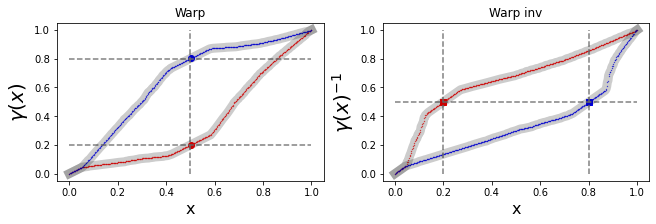

In [97]:
# Gamma inverse
from scipy.interpolate import CubicSpline

#gamma_t = (x[-1] - x[0])*gamma_t + x[0]

fun_gamma_inv = [CubicSpline(gamma_t[:,i], x) for i in range(2)]
gamma_inv = np.array( [fun_gamma_inv[i](x) for i in range(2)]).T

# plotting
idx_05 = np.argmin(abs(x-0.5))
print("- idx_05 of x=0.5 is %i"%(idx_05))


fig, axes = plt.subplots(1,2,figsize=(9, 3), constrained_layout=True)
axes = axes.ravel()

fontsize = 20

i=0
axes[i].set_title("Warp")
axes[i].plot(x, gamma_t[:,0], "k", lw=9, alpha=0.2)
axes[i].scatter(x, gamma_t[:,0], s=.1, color="r")
axes[i].scatter(x[idx_05], gamma_t[idx_05,0], color="r")

axes[i].plot(x, gamma_t[:,1], "k", lw=9, alpha=0.2)
axes[i].scatter(x, gamma_t[:,1], s=.1, color="b")
axes[i].scatter(x[idx_05], gamma_t[idx_05,1], color="b");

axes[i].hlines([0.2, 0.8], 0, 1, ls="dashed", color="gray")
axes[i].vlines(0.5, 0, 1, ls="dashed", color="gray")

axes[i].set_xlabel("x", fontsize=16)
axes[i].set_ylabel("$\gamma(x) $", fontsize=20);

i+=1
axes[i].set_title("Warp inv")
axes[i].plot(x, gamma_inv[:,0], "k", lw=9, alpha=0.2)
axes[i].scatter(x, gamma_inv[:,0], s=.1, color="r")
axes[i].scatter(0.2, 0.5, marker="s", color="r")

axes[i].plot(x, gamma_inv[:,1], "k", lw=9, alpha=0.2)
axes[i].scatter(x, gamma_inv[:,1], s=.1, color="b")
axes[i].scatter(0.8, 0.5, marker="s", color="b");

axes[i].vlines([0.2, 0.8], 0, 1, ls="dashed", color="gray")
axes[i].hlines(0.5, 0, 1, ls="dashed", color="gray")

axes[i].set_xlabel("x", fontsize=16)
axes[i].set_ylabel("$\gamma(x)^{-1} $", fontsize=20);

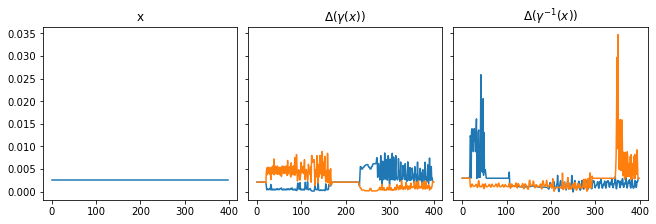

In [90]:
# x-axis is linearly spaced? 

fig, axes = plt.subplots(1,3,figsize=(9,3), sharey=True, constrained_layout=True)
axes = axes.ravel()

i=0
axes[i].set_title("x")
axes[i].plot(np.diff(x))

i+=1
axes[i].set_title("$\Delta(\gamma(x))$")
axes[i].plot(np.diff(gamma_t, axis=0))

i+=1
axes[i].set_title("$\Delta(\gamma^{-1}(x))$")
axes[i].plot(np.diff(gamma_inv, axis=0));

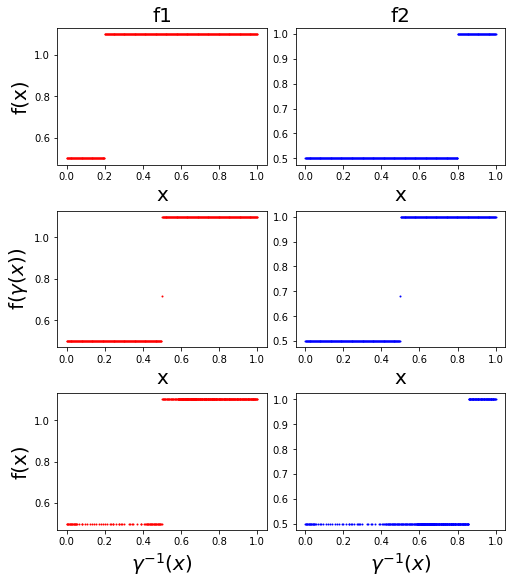

In [103]:
# plotting samples

fig, axes = plt.subplots(3,2,figsize=(7,8), constrained_layout=True)
axes = axes.ravel()

fontsize = 20

i=0
axes[i].set_title("f1", fontsize=fontsize)
axes[i].scatter(x, f[:,0], s=1, color="r")
#axes[i].set_ylabel("Step functions\n (samples)", fontsize=14)
axes[i].set_ylabel("f(x)", fontsize=fontsize)
axes[i].set_xlabel("x", fontsize=fontsize)

i+=1
axes[i].set_title("f2", fontsize=fontsize)
axes[i].scatter(x, f[:,1],s=1, color="b");
axes[i].set_xlabel("x", fontsize=fontsize)

i+=1
axes[i].set_ylabel("f($\gamma(x)$)", fontsize=fontsize)
axes[i].scatter(x, f_new[:,0],s=1, color="r");
axes[i].set_xlabel("x", fontsize=fontsize)

i+=1
axes[i].scatter(x, f_new[:,1],s=1, color="b");
axes[i].set_xlabel("x", fontsize=fontsize)


i+=1
#axes[i].set_title("f1(x)")
axes[i].scatter(gamma_inv[:,0], f[:,0],s=1, color="r");
axes[i].set_ylabel("f(x)", fontsize=fontsize)
axes[i].set_xlabel("$\gamma^{-1}(x)$", fontsize=fontsize)

i+=1
#axes[i].set_title("f2")
axes[i].scatter(gamma_inv[:,0], f[:,1],s=1, color="b");
axes[i].set_xlabel("$\gamma^{-1}(x)$", fontsize=fontsize);
